In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
import cv2
import keras

In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                width_shift_range=0.3,
                                                                height_shift_range=0.3,
                                                                brightness_range=[0.2,0.3],
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                channel_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                preprocessing_function=preprocess_input)

In [4]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
train_path ='/Users/antarabhattacharya/Documents/Capstone Project AIML/capstone-project-CV2/Car Images/Train Images'
test_path ='/Users/antarabhattacharya/Documents/Capstone Project AIML/capstone-project-CV2/Car Images/Test Images'

In [6]:
train_generator = train_datagen.flow_from_directory(train_path,class_mode='categorical',target_size=(224,224),batch_size=32)

Found 8144 images belonging to 196 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(test_path,class_mode='categorical',target_size=(224,224),batch_size=32)

Found 8041 images belonging to 196 classes.


In [8]:
model = tf.keras.applications.ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [9]:
x1 = model.output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)
x3 = tf.keras.layers.Dropout(0.5)(x2)
x4 = tf.keras.layers.BatchNormalization()(x3)

In [10]:
prediction = tf.keras.layers.Dense(196,activation='softmax')(x4)

In [11]:
prediction

<KerasTensor: shape=(None, 196) dtype=float32 (created by layer 'dense')>

In [12]:
len(model.layers)

175

In [13]:
for layer in model.layers:
  layer.trainable = False

In [14]:
final_model = tf.keras.models.Model(inputs=model.input,outputs=prediction)

In [15]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
final_model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics=['accuracy'])

In [17]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('./working/4_carclass_Res.h5',
                                                      save_best_only=True,
                                                      monitor='val_accuracy',
                                                      mode = 'max',
                                                      verbose=1)

In [18]:
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

In [19]:
fit_history = final_model.fit(train_generator,epochs=100,
                steps_per_epoch=16,
                validation_data=test_generator,
                validation_steps=17,
                callbacks=[model_checkpoint],
                verbose=1)

Epoch 1/100
16/16 [==============================] - 51s 3s/step - loss: 6.0477 - accuracy: 0.0051 - val_loss: 5.9739 - val_accuracy: 0.0110

Epoch 00001: val_accuracy improved from -inf to 0.01103, saving model to ./working/4_carclass_Res.h5
Epoch 2/100
16/16 [==============================] - 50s 3s/step - loss: 6.1245 - accuracy: 0.0017 - val_loss: 5.7600 - val_accuracy: 0.0037

Epoch 00002: val_accuracy did not improve from 0.01103
Epoch 3/100
16/16 [==============================] - 50s 3s/step - loss: 5.7725 - accuracy: 0.0018 - val_loss: 5.4516 - val_accuracy: 0.0110

Epoch 00003: val_accuracy did not improve from 0.01103
Epoch 4/100
16/16 [==============================] - 47s 3s/step - loss: 5.4910 - accuracy: 0.0171 - val_loss: 5.2486 - val_accuracy: 0.0312

Epoch 00004: val_accuracy improved from 0.01103 to 0.03125, saving model to ./working/4_carclass_Res.h5
Epoch 5/100
16/16 [==============================] - 49s 3s/step - loss: 5.5387 - accuracy: 0.0222 - val_loss: 5.1241

In [20]:
print(fit_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


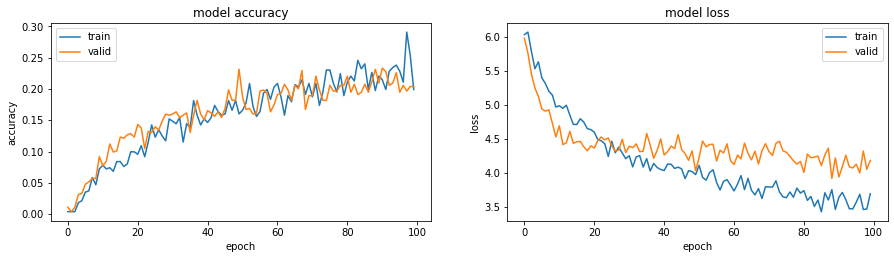

In [21]:
%matplotlib inline

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()